# Questions to answeres are
1. Top 25 companies which hires most h1b1 visa applicants
2. Top 25 companies according to their Salary
3. Top 25 States where applicants apply most
4. Top 25 Job Titles
5. 25 Job Titles from bottom according to Salary
6. Top 25 states with full_time_position is NO.
7. Top 25 States which Denys most
 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [ ]:
h1 = pd.read_csv("F:\Data_science\seaborn-data\h1b_kaggle.csv")


In [5]:
h1.size

33027038

In [6]:
h1.shape

(3002458, 11)

In [7]:
h1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [8]:
h1.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [44]:
drop_columns = [ "Unnamed: 0","lon","lat",'SOC_NAME']

for col in drop_columns : 
    h1.drop(col,axis=1,inplace=True)
    

In [45]:
h1.columns


Index(['CASE_STATUS', 'EMPLOYER_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'YEAR', 'WORKSITE'],
      dtype='object')

In [46]:
h1.rename(mapper={'EMPLOYER_NAME':'Companies',
                 'JOB_TITLE':'JOB',
                 'FULL_TIME_POSITION':'WORKING_TIME',
                 'PREVAILING_WAGE':'SALARY',
                  'CASE_STATUS':'status'
                 },axis=1,inplace=True)


In [47]:
h1.columns

Index(['status', 'Companies', 'JOB', 'WORKING_TIME', 'SALARY', 'YEAR',
       'WORKSITE'],
      dtype='object')

In [48]:
h1.head()

,status,Companies,JOB,WORKING_TIME,SALARY,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [88]:
h1[:60000].to_csv("myvisa.csv")

In [89]:
visa=pd.read_csv("myvisa.csv")
visa.head()

,Unnamed: 0,status,Companies,JOB,WORKING_TIME,SALARY,YEAR,WORKSITE
0,0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


# Top 25 companies which hires most h1b1 visa applicants 

In [23]:
hire=visa['Companies'].value_counts()[:25]
hire

CAPGEMINI AMERICA INC                                    344
AMAZON CORPORATE LLC                                     305
SYNTEL CONSULTING INC.                                   298
DELOITTE CONSULTING LLP                                  240
CAPGEMINI FINANCIAL SERVICES USA INC                     174
CAPGEMINI FINANCIAL SERVICES USA INC. (LEGACY KANBAY)    159
APPLE INC.                                               125
MURPHY-BROWN LLC                                         124
SYNTEL INC                                               103
MICROSOFT CORPORATION                                     93
GOOGLE INC.                                               89
FACEBOOK, INC.                                            87
AMAZON.COM.DEDC, LLC                                      87
TECH MAHINDRA (AMERICAS),INC.                             86
ACCENTURE LLP                                             82
VIRTUSA CORPORATION                                       75
MANHATTAN ASSOCIATES, IN

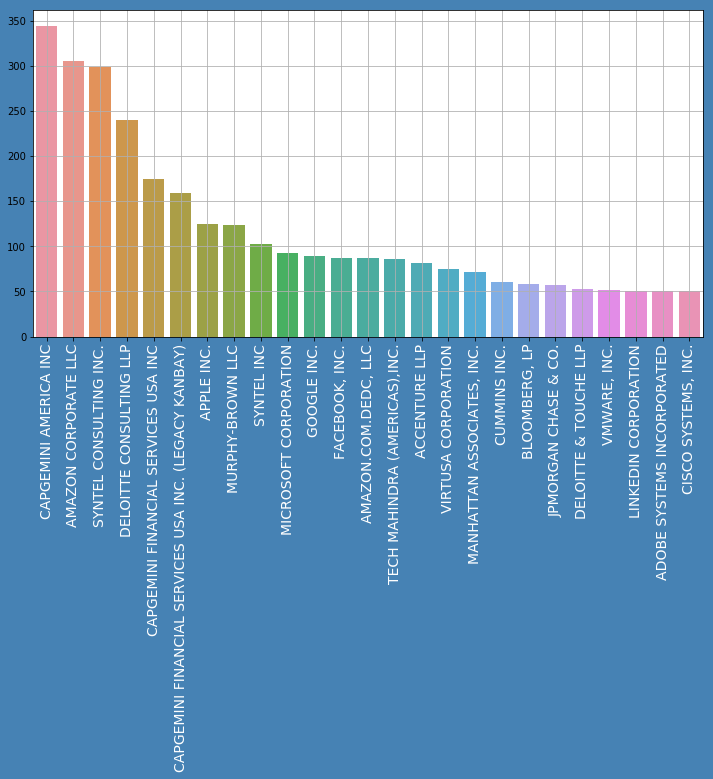

In [24]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="steelblue")
sns.barplot(hire.index,hire.values,ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.grid()
plt.show()

In [25]:
initials=[]
for i in list(hire.index):
    if len(i)>25:
        s=""
        x=i.split(" ")
        for j in x:
            s+=j[0]
        initials.append(s)
    else:
        initials.append(i)
initials[5]='CFSUI(LK)'


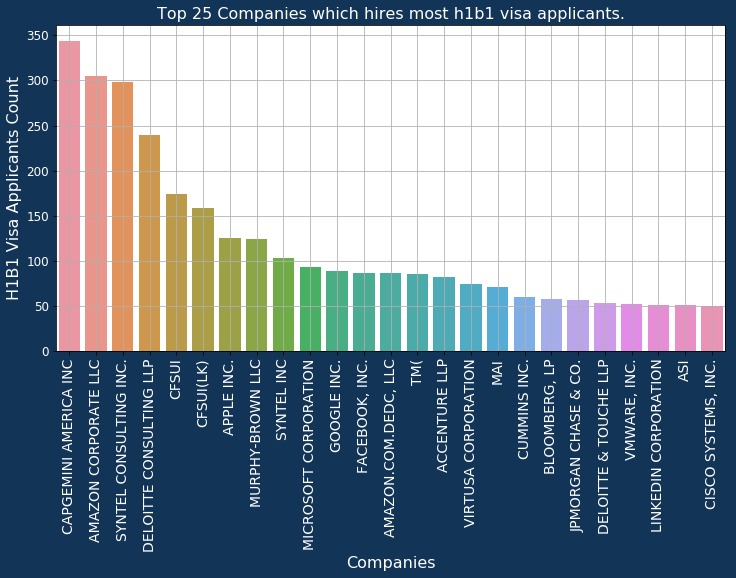

In [26]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(initials,hire.values,ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title("Top 25 Companies which hires most h1b1 visa applicants.",fontsize=16,color="white")
plt.grid()
plt.xlabel("Companies",fontsize=16,color="white")
plt.ylabel("H1B1 Visa Applicants Count",fontsize=16,color="white")
plt.show()

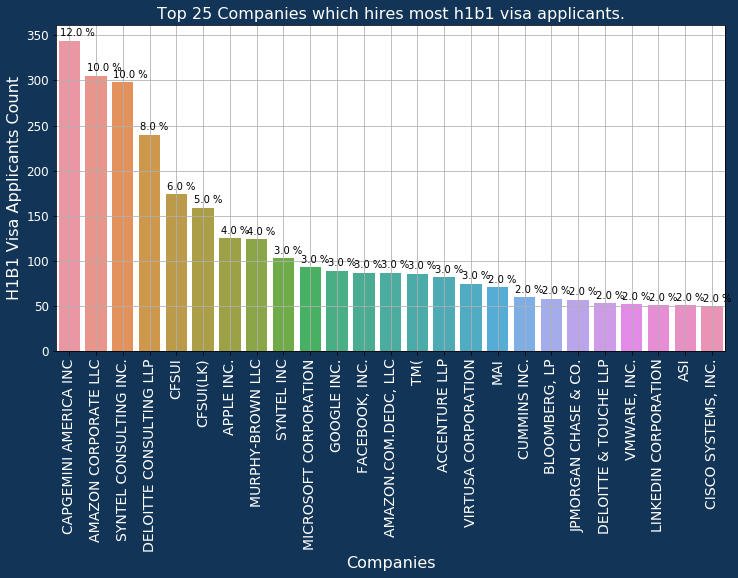

In [27]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(initials,hire.values,ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title("Top 25 Companies which hires most h1b1 visa applicants.",fontsize=16,color="white")
plt.grid()
plt.xlabel("Companies",fontsize=16,color="white")
plt.ylabel("H1B1 Visa Applicants Count",fontsize=16,color="white")
height = []
for pat in ax.patches : 
    height.append(pat.get_height())
per = []
s = sum(height)
for h in height : 
    per.append(str(round(h/s,2)*100)+" %")
for pat,p in zip(ax.patches,per) : 
    height = pat.get_height()+5
    width = pat.get_x()+0.05
    ax.text(width,height,p,fontsize=10,color="black")


plt.show()

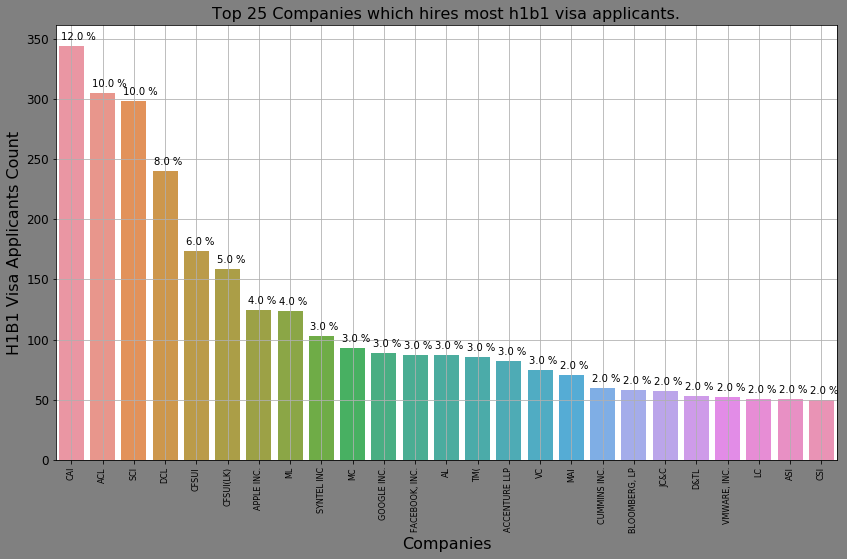

In [28]:
initials=[]
for i in list(hire.index):
    if len(i)>15:
        s=""
        x=i.split(" ")
        for j in x:
            s+=j[0]
        initials.append(s)
    else:
        initials.append(i)
initials[5]='CFSUI(LK)'
fig,ax=plt.subplots(figsize=(14,8),facecolor="Gray")
sns.barplot(initials,hire.values,ax=ax)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)
plt.title("Top 25 Companies which hires most h1b1 visa applicants.",fontsize=16)
plt.grid()
plt.xlabel("Companies",fontsize=16)
plt.ylabel("H1B1 Visa Applicants Count",fontsize=16)
height = []
for pat in ax.patches : 
    height.append(pat.get_height())
per = []
s = sum(height)
for h in height : 
    per.append(str(round(h/s,2)*100)+" %")
for pat,p in zip(ax.patches,per) : 
    height = pat.get_height()+5
    width = pat.get_x()+0.05
    ax.text(width,height,p,fontsize=10,color="black")
plt.savefig("Top_25_comp_which_hires_most_h1b1_visa_applicants.jpeg")

plt.show()

# Top 25 companies according to their Salary

In [29]:
sal=visa[['Companies','SALARY']].groupby('Companies').mean().sort_values(by='SALARY',ascending=False)[:25]
sal


,SALARY
Companies,
E AND D MEDIA INC.,1.646569e+08
"TERRALOGIC SOLUTIONS, INC.",1.298107e+08
3M COMPANY,8.401017e+07
GVHB,7.280000e+07
"DON IGNACIO CULINARY ARTS SCHOOL, INC.",9.825013e+05
FOUR FIVE EIGHT LLC,4.288130e+05
"CARIBE PAPER TRADING COMPANY, LLC",4.080310e+05
"ASTEC AMERICA, LLC",4.000000e+05
ROCKETSPACE INC.,2.920000e+05


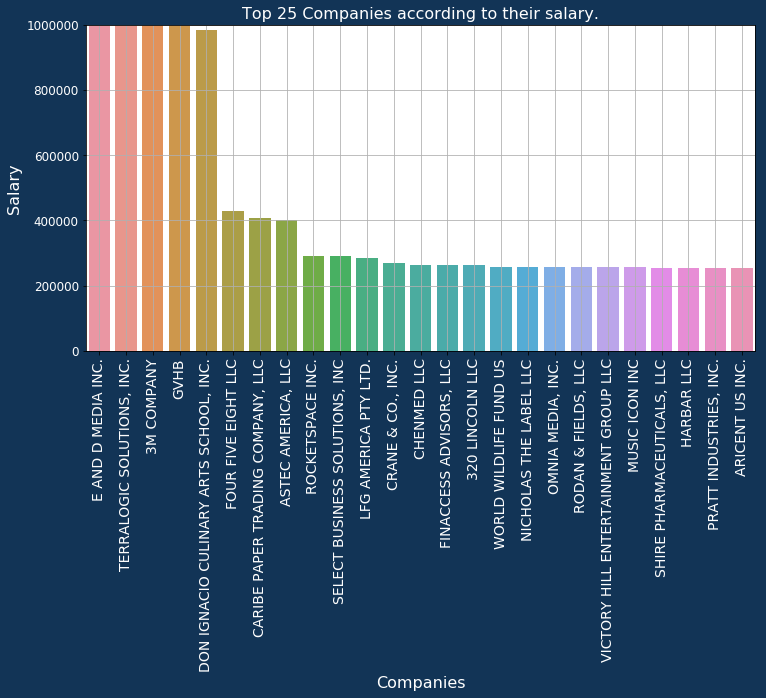

In [30]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(sal.index,sal['SALARY'],ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title("Top 25 Companies according to their salary.",fontsize=16,color="white")
plt.grid()
plt.xlabel("Companies",fontsize=16,color="white")
plt.ylabel("Salary",fontsize=16,color="white")
plt.ylim([0,1000000])
plt.show()

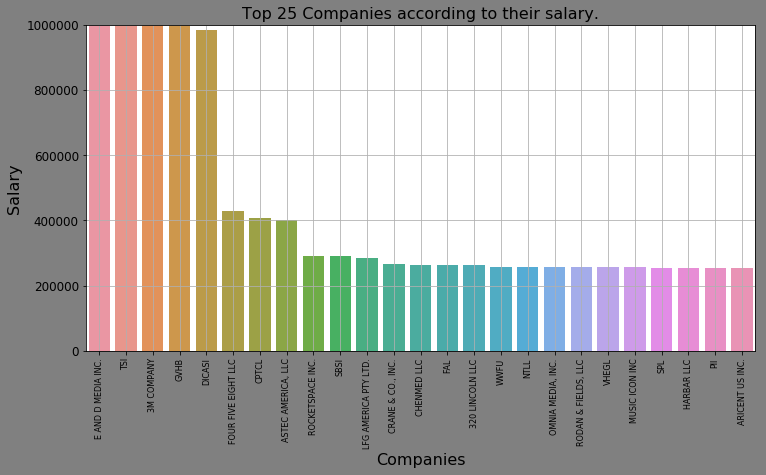

In [31]:
initials=[]
for i in list(sal.index):
    if len(i)>20:
        s=""
        x=i.split(" ")
        for j in x:
            s+=j[0]
        initials.append(s)
    else:
        initials.append(i)
fig,ax=plt.subplots(figsize=(12,6),facecolor="Gray")
sns.barplot(initials,sal['SALARY'],ax=ax)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)
plt.title("Top 25 Companies according to their salary.",fontsize=16)
plt.grid()
plt.xlabel("Companies",fontsize=16)
plt.ylabel("Salary",fontsize=16)
plt.ylim([0,1000000])
plt.savefig("Top_25_Companies_according_to_their_salary.jpeg")
plt.show()

# Top 25 States where applicants apply most

In [32]:
state=visa['WORKSITE'].value_counts()[:25]
state

NEW YORK, NEW YORK                  2345
SAN FRANCISCO, CALIFORNIA            997
HOUSTON, TEXAS                       593
CHICAGO, ILLINOIS                    470
SEATTLE, WASHINGTON                  465
LOS ANGELES, CALIFORNIA              345
ATLANTA, GEORGIA                     341
SAN JOSE, CALIFORNIA                 316
MIAMI, FLORIDA                       302
SUNNYVALE, CALIFORNIA                228
MOUNTAIN VIEW, CALIFORNIA            226
PALO ALTO, CALIFORNIA                213
DALLAS, TEXAS                        209
BOSTON, MASSACHUSETTS                192
SANTA CLARA, CALIFORNIA              189
PHOENIX, ARIZONA                     176
AUSTIN, TEXAS                        156
BELLEVUE, WASHINGTON                 139
CUPERTINO, CALIFORNIA                130
SAN DIEGO, CALIFORNIA                125
MENLO PARK, CALIFORNIA               123
CHARLOTTE, NORTH CAROLINA            117
BROOKLYN, NEW YORK                   112
WASHINGTON, DISTRICT OF COLUMBIA     110
JERSEY CITY, NEW

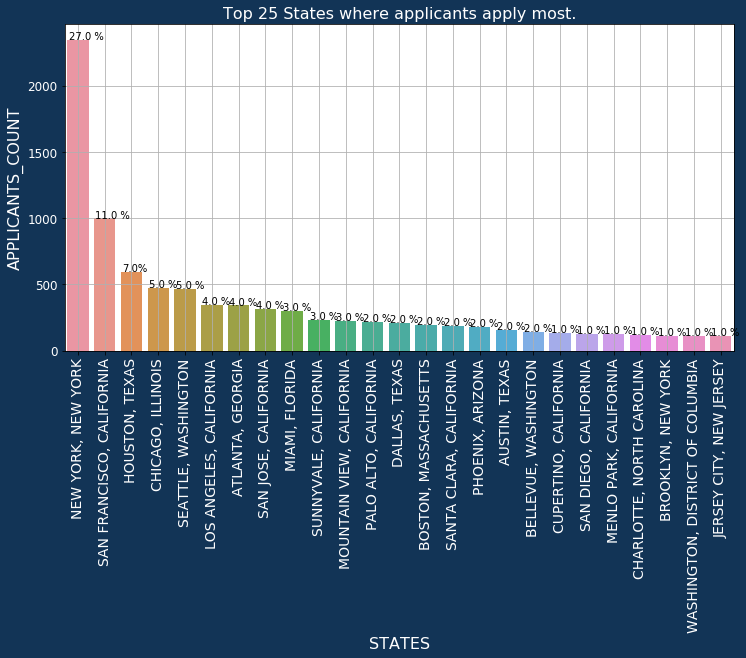

In [33]:


fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(state.index,state.values,ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title("Top 25 States where applicants apply most.",fontsize=16,color="white")
plt.grid()
plt.xlabel("STATES",fontsize=16,color="white")
plt.ylabel("APPLICANTS_COUNT",fontsize=16,color="white")
height = []
for pat in ax.patches : 
    height.append(pat.get_height())
per = []
s = sum(height)
for h in height : 
    per.append(str(round(h/s,2)*100)+" %")
per[2]="7.0%"
for pat,p in zip(ax.patches,per) : 
    height = pat.get_height()+5
    width = pat.get_x()+0.05
    ax.text(width,height,p,fontsize=10,color="black")


plt.show()

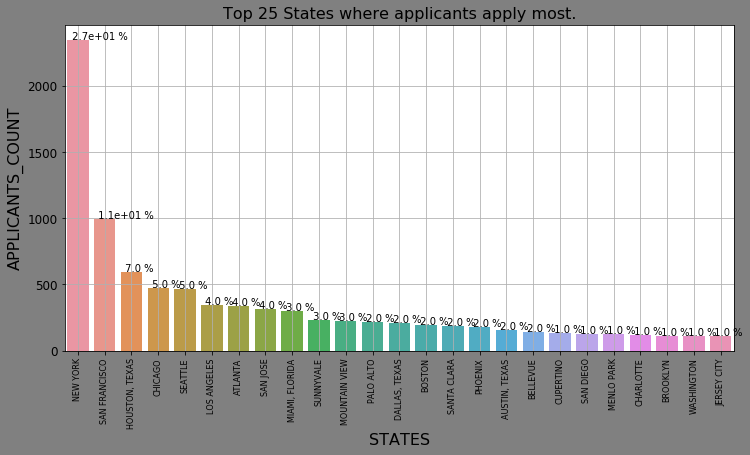

In [34]:
initials=[]
for i in list(state.index):
    if len(i)>15:
        s=""
        x=i.split(",")
        
        initials.append(x[0])
    else:
        initials.append(i)
fig,ax=plt.subplots(figsize=(12,6),facecolor="Gray")
sns.barplot(initials,state.values,ax=ax)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)
plt.title("Top 25 States where applicants apply most.",fontsize=16)
plt.grid()
plt.xlabel("STATES",fontsize=16)
plt.ylabel("APPLICANTS_COUNT",fontsize=16)
height = []
for pat in ax.patches : 
    height.append(pat.get_height())
per = []
s = sum(height)
for h in height : 
    per.append(str({0:.2}).format(round(h/s,2)*100)+" %")
for pat,p in zip(ax.patches,per) : 
    height = pat.get_height()+5
    width = pat.get_x()+0.05
    ax.text(width,height,p,fontsize=10,color="black")
plt.savefig("Top_25_States_where_applicants_apply_most.jpeg")

plt.show()

# Top 25 Job Titles

In [35]:
job=visa['JOB'].value_counts()[:25]
job

PROJECT MANAGER                 934
MANAGER                         338
MARKETING MANAGER               315
OPERATIONS MANAGER              261
PRODUCT MANAGER                 246
LEAD CONSULTANT                 210
ENGINEERING MANAGER             205
GENERAL MANAGER                 171
SALES MANAGER                   167
BUSINESS DEVELOPMENT MANAGER    162
CHIEF EXECUTIVE OFFICER         159
SOFTWARE DEVELOPMENT MANAGER    155
FINANCIAL MANAGER               129
PATHWAYS OPERATIONS MANAGER     129
FINANCE MANAGER                 116
SENIOR PRODUCT MANAGER          116
PROGRAM MANAGER                 104
CHIEF FINANCIAL OFFICER          96
CHIEF OPERATING OFFICER          92
CONTROLLER                       89
MANAGER TRAINEE                  84
SENIOR MANAGER                   82
CHIEF TECHNOLOGY OFFICER         82
MANAGING DIRECTOR                81
DELIVERY MANAGER 4               80
Name: JOB, dtype: int64

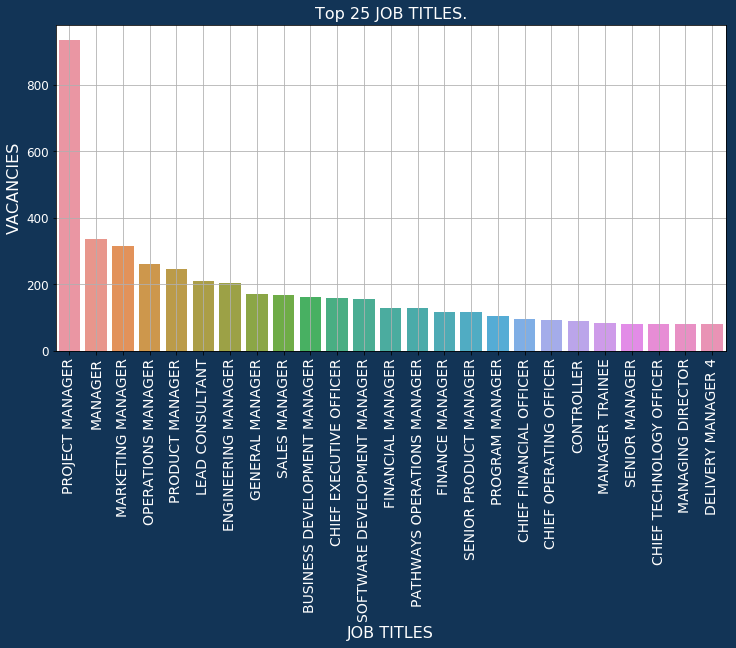

In [36]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(job.index,job.values,ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title("Top 25 JOB TITLES.",fontsize=16,color="white")
plt.grid()
plt.xlabel("JOB TITLES",fontsize=16,color="white")
plt.ylabel("VACANCIES",fontsize=16,color="white")



plt.show()

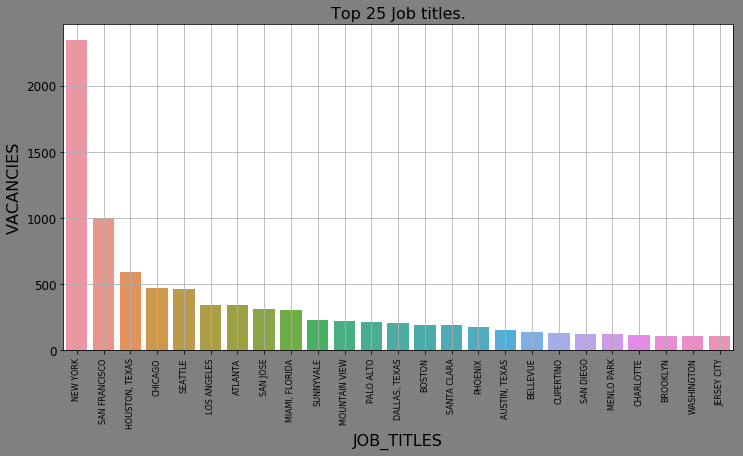

In [37]:
initials=[]
for i in list(state.index):
    if len(i)>15:
        s=""
        x=i.split(",")
        
        initials.append(x[0])
    else:
        initials.append(i)
fig,ax=plt.subplots(figsize=(12,6),facecolor="Gray")
sns.barplot(initials,state.values,ax=ax)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)
plt.title("Top 25 Job titles.",fontsize=16)
plt.grid()
plt.xlabel("JOB_TITLES",fontsize=16)
plt.ylabel("VACANCIES",fontsize=16)

plt.savefig("Top_25_Job_titles.jpeg")

plt.show()

#  25 Job Titles from bottom according to Salary

In [38]:
title=visa[['JOB','SALARY']].groupby('JOB').mean().sort_values(by='SALARY',ascending=True)[:25]
title

,SALARY
JOB,
CIS MANAGERS,0.000000
CO-EXECUTIVE DIRECTOR,12000.000000
OFFICE ADMINISTRATOR AND SAFETY COORDINATOR,15080.000000
HUMAN RESOURCES MANAGERS,15756.000000
CHIEF SUSTAINABILITY OFFICER,17264.000000
DIRECTOR (CLEAN ENERGY AND INFRASTRUCTURE),18749.000000
INFORMATION TECHNOLOY SPECIALIST,25584.000000
ACADEMY DIRECTOR,27040.000000
STUDENT LIFE ASSOCIATE,27324.000000


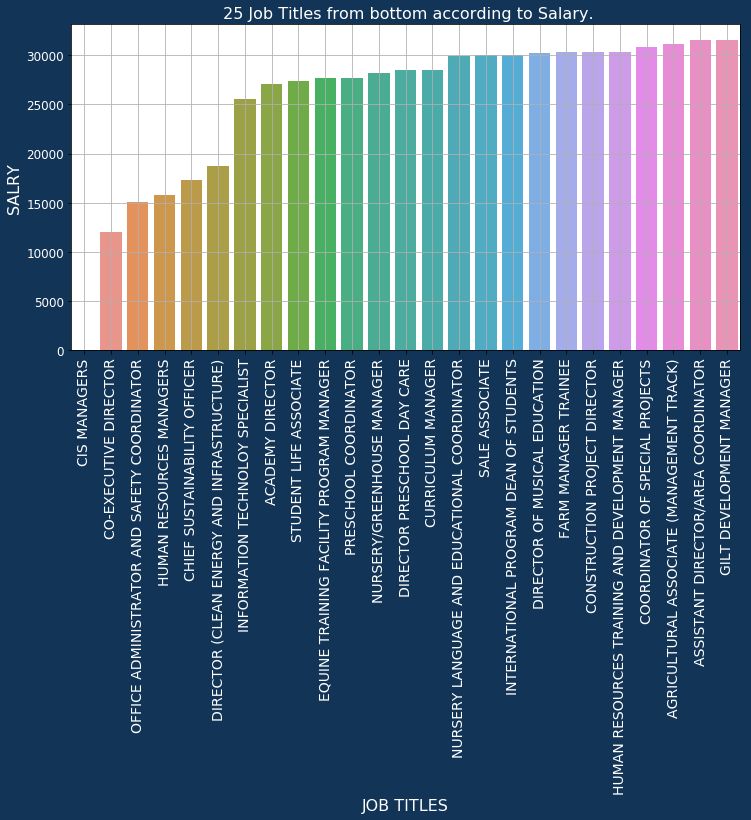

In [39]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(title.index,title['SALARY'],ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title(" 25 Job Titles from bottom according to Salary.",fontsize=16,color="white")
plt.grid()
plt.xlabel("JOB TITLES",fontsize=16,color="white")
plt.ylabel("SALRY",fontsize=16,color="white")



plt.show()

c:\users\sparsh jain\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


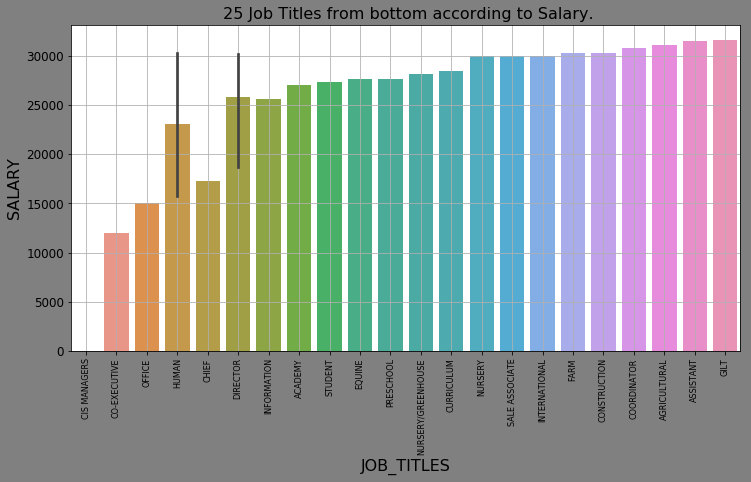

In [40]:
initials=[]
for i in list(title.index):
    if len(i)>15:
        s=""
        x=i.split(" ")
        
        initials.append(x[0])
    else:
        initials.append(i)
fig,ax=plt.subplots(figsize=(12,6),facecolor="Gray")
sns.barplot(initials,title['SALARY'],ax=ax)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)
plt.title(" 25 Job Titles from bottom according to Salary.",fontsize=16)
plt.grid()
plt.xlabel("JOB_TITLES",fontsize=16)
plt.ylabel("SALARY",fontsize=16)

plt.savefig("25_Job_Titles_from_bottom_according_to_salary.jpeg")

plt.show()

# Top 25 States whose Full time position is NO

In [53]:
visa.columns

Index(['Unnamed: 0', 'status', 'Companies', 'JOB', 'WORKING_TIME', 'SALARY',
       'YEAR', 'WORKSITE'],
      dtype='object')

In [55]:
deny=visa[['WORKSITE','WORKING_TIME']]
den=deny[deny['WORKING_TIME']=='N']
z=den['WORKSITE'].value_counts()[:25]
z

HOUSTON, TEXAS                  100
MIAMI, FLORIDA                   98
CHICAGO, ILLINOIS                94
LOS ANGELES, CALIFORNIA          86
NEW YORK, NEW YORK               74
SAN FRANCISCO, CALIFORNIA        59
DALLAS, TEXAS                    41
SAIPAN, NA                       34
AUSTIN, TEXAS                    29
ATLANTA, GEORGIA                 23
PITTSBURGH, PENNSYLVANIA         17
LAS VEGAS, NEVADA                17
SAN JOSE, CALIFORNIA             16
BOSTON, MASSACHUSETTS            15
PORTLAND, OREGON                 15
YUMA, COLORADO                   15
CITY OF INDUSTRY, CALIFORNIA     15
PLANO, TEXAS                     14
LUCERNE, MISSOURI                13
PRINCETON, MISSOURI              12
COLLIERVILLE, TENNESSEE          12
PROVO, UTAH                      12
ORLANDO, FLORIDA                 11
STILLWATER, OKLAHOMA             11
PHOENIX, ARIZONA                 11
Name: WORKSITE, dtype: int64

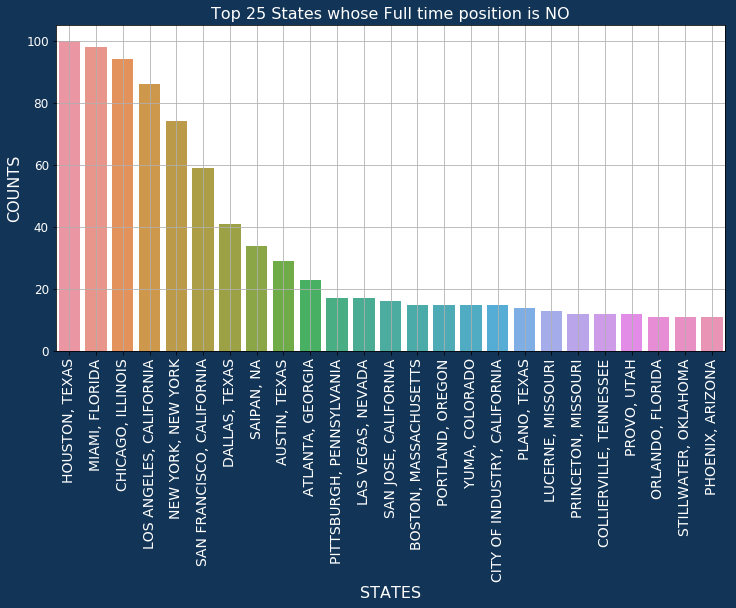

In [58]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(z.index,z.values,ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title("Top 25 States whose Full time position is NO",fontsize=16,color="white")
plt.grid()
plt.xlabel("STATES",fontsize=16,color="white")
plt.ylabel("COUNTS",fontsize=16,color="white")

plt.show()

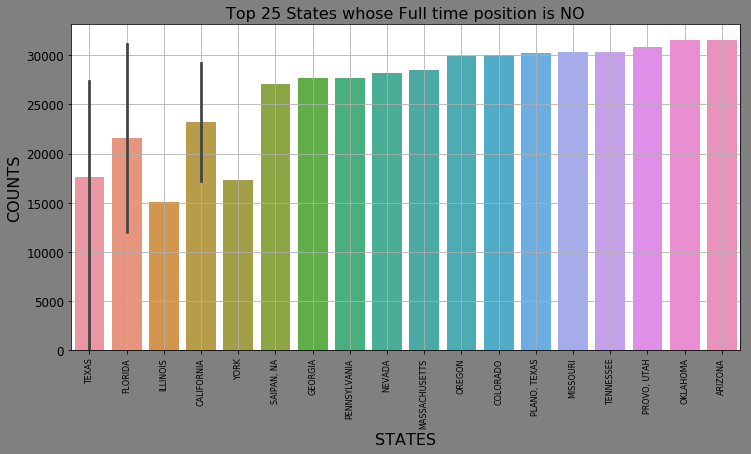

In [62]:
initials=[]
for i in list(z.index):
    if len(i)>12:
        s=""
        x=i.split(" ")
        
        initials.append(x[-1])
    else:
        initials.append(i)
fig,ax=plt.subplots(figsize=(12,6),facecolor="Gray")
sns.barplot(initials,title['SALARY'],ax=ax)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)
plt.title("Top 25 States whose Full time position is NO",fontsize=16)
plt.grid()
plt.xlabel("STATES",fontsize=16)
plt.ylabel("COUNTS",fontsize=16)

plt.savefig("Top 25 States whose Full time position is NO.jpeg")

plt.show()

# Top 25 States which Denys most

In [63]:
visa.head()

,Unnamed: 0,status,Companies,JOB,WORKING_TIME,SALARY,YEAR,WORKSITE
0,0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [75]:
deny=visa[visa['status']=="DENIED"]
deny=deny['WORKSITE'].value_counts()[:25]
deny

NEW YORK, NEW YORK                  87
SAN FRANCISCO, CALIFORNIA           23
LOS ANGELES, CALIFORNIA             20
HOUSTON, TEXAS                      19
SAN JOSE, CALIFORNIA                13
SAIPAN, NA                          12
CHICAGO, ILLINOIS                   12
WASHINGTON, DISTRICT OF COLUMBIA    12
BOSTON, MASSACHUSETTS               12
ATLANTA, GEORGIA                    10
MIAMI, FLORIDA                      10
BELLEVUE, WASHINGTON                10
BROOKLYN, NEW YORK                   9
SUNNYVALE, CALIFORNIA                8
SAN DIEGO, CALIFORNIA                7
DALLAS, TEXAS                        6
PALO ALTO, CALIFORNIA                5
LAS VEGAS, NEVADA                    5
PROVO, UTAH                          5
LECANTO, FLORIDA                     4
CHARLOTTE, NORTH CAROLINA            4
SEATTLE, WASHINGTON                  4
SOUTHPORT, CONNECTICUT               4
CEDAR RAPIDS, IOWA                   4
PORTLAND, OREGON                     4
Name: WORKSITE, dtype: in

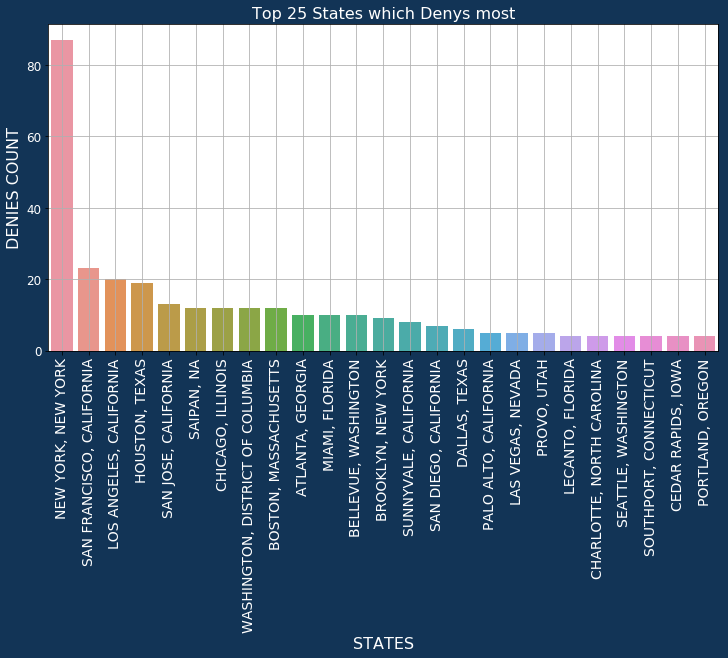

In [77]:
fig,ax=plt.subplots(figsize=(12,6),facecolor="#123456")
sns.barplot(deny.index,deny.values,ax=ax)
plt.xticks(rotation=90,fontsize=14,color="white")
plt.yticks(fontsize=12,color="white")
plt.title("Top 25 States which Denys most",fontsize=16,color="white")
plt.grid()
plt.xlabel("STATES",fontsize=16,color="white")
plt.ylabel("DENIES COUNT",fontsize=16,color="white")

plt.show()

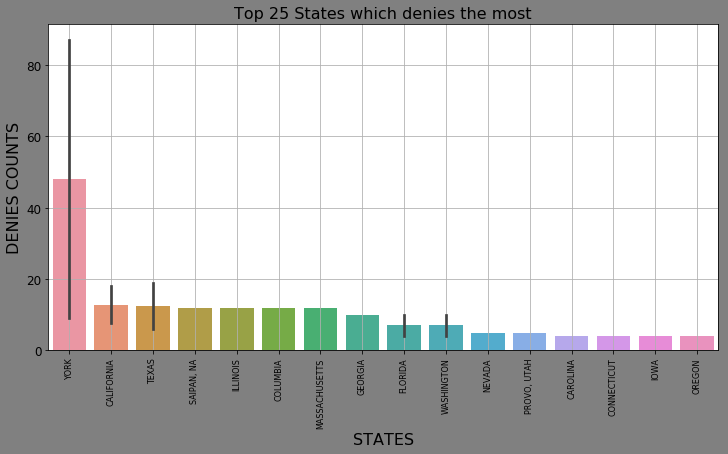

In [113]:
initials=[]
for i in list(deny.index):
    if len(i)>12:
        s=""
        x=i.split(" ")
        
        initials.append(x[-1])
    else:
        initials.append(i)
fig,ax=plt.subplots(figsize=(12,6),facecolor="Gray")
sns.barplot(initials,deny.values,ax=ax)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=12)
plt.title("Top 25 States which denies the most",fontsize=16)
plt.grid()
plt.xlabel("STATES",fontsize=16)
plt.ylabel("DENIES COUNTS",fontsize=16)

plt.savefig("Top 25 States which denies the most.jpeg")

plt.show()

# Growth Increase per year in Number of Applications for h1b visa analysis

In [95]:
growth=visa['YEAR'].value_counts()
growth

2016.0    60000
Name: YEAR, dtype: int64

# How many applicantes are not Full Time Job and what is average salaray

In [96]:
visa.head()

,Unnamed: 0,status,Companies,JOB,WORKING_TIME,SALARY,YEAR,WORKSITE
0,0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [98]:
appl= visa[['SALARY','WORKING_TIME']]
appl=appl[appl['WORKING_TIME']=="N"]
appl['WORKING_TIME'].value_counts()

N    29636
Name: WORKING_TIME, dtype: int64

In [111]:
appl=appl['SALARY'].value_counts()[:25]

KeyError: 'SALARY'

In [106]:
appl

55973.0    768
45906.0    697
55370.0    597
61589.0    333
55474.0    329
52915.0    323
45905.6    323
55536.0    294
39353.6    274
39354.0    242
64189.0    236
58656.0    223
55369.6    221
62109.0    214
47444.8    210
42848.0    202
57304.0    196
47445.0    188
56160.0    188
49400.0    166
49109.0    163
45822.0    158
50086.0    148
51210.0    138
60445.0    132
51376.0    129
69701.0    126
58178.0    124
47029.0    120
47965.0    119
          ... 
54017.6      1
50068.0      1
26062.4      1
69115.0      1
47008.0      1
42764.8      1
66200.0      1
46200.0      1
61381.0      1
54620.8      1
44800.0      1
66289.6      1
47985.6      1
43035.2      1
64605.0      1
44324.8      1
35838.4      1
40080.0      1
33092.8      1
30285.0      1
27934.4      1
33197.0      1
38667.0      1
55052.0      1
66414.0      1
49200.0      1
66091.2      1
24794.0      1
66684.8      1
38709.0      1
Name: SALARY, Length: 2989, dtype: int64